In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df.shape

(3276, 10)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

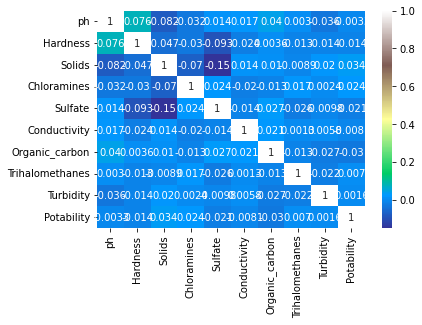

<Figure size 720x1152 with 0 Axes>

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.figure(figsize=(10,16))
plt.show()

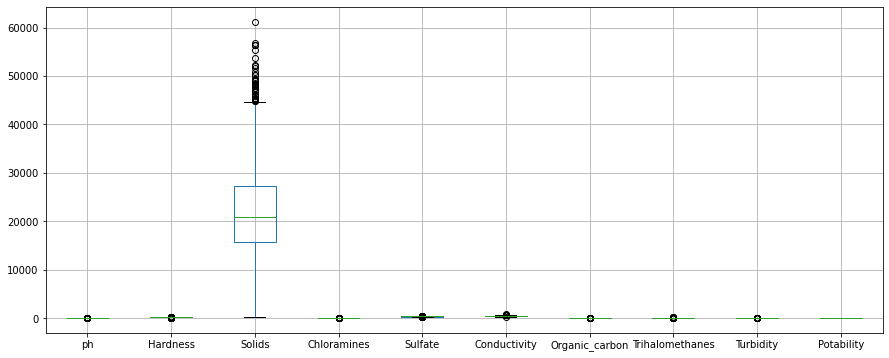

In [9]:
df.boxplot(figsize=(15,6))
plt.show()

In [10]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

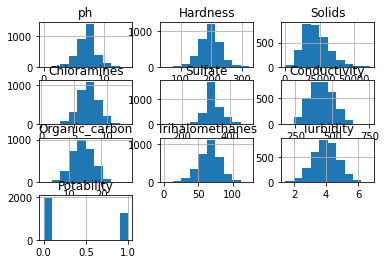

In [11]:
df.hist()
plt.show()

In [12]:
X=df.drop("Potability",axis=1)
y=df["Potability"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=101)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",min_samples_split=9,splitter="best")

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [17]:
asd=dt.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(asd,y_test)

0.600609756097561

In [19]:
confusion_matrix(asd,y_test)

array([[266, 126],
       [136, 128]], dtype=int64)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
dt=DecisionTreeClassifier()
criterion=["gini","entropy"]
splitter=["best","random"]
min_samples_split=range(1,10)

grid=dict(criterion=criterion,splitter=splitter,min_samples_split=min_samples_split)
cv=RepeatedStratifiedKFold(n_splits=5,random_state=101)
grid_search_cv_dt=GridSearchCV(estimator=dt,param_grid=grid,scoring="accuracy",cv=cv)

In [21]:
grid_search_cv_dt.fit(X_train,y_train)

C:\Users\SOMANATH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SOMANATH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SOMANATH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\SOMANATH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tre

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [22]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 7, 'splitter': 'best'}


In [23]:
prediction_grid=grid_search_cv_dt.predict(X_test)

In [24]:
accuracy_score(y_test,prediction_grid)

0.5960365853658537